In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv("gdm_first_trimester_ml_dataset.csv")
df_data.dtypes

age_years                  float64
bmi_prepreg_kg_m2          float64
systolic_bp_mmHg           float64
diastolic_bp_mmHg          float64
map_mmHg                   float64
gestational_weeks          float64
fpg_mmol_l                 float64
hba1c_percent              float64
insulin_uIU_ml             float64
homa_ir                    float64
triglycerides_mmol_l       float64
hdl_mmol_l                 float64
parity                       int64
family_history_t2d           int64
previous_gdm                 int64
pcos                         int64
smoking_first_trimester      int64
physical_activity_level    float64
diet_score_0_100           float64
label_gdm                    int64
dtype: object

In [3]:
df_data = df_data.drop(columns=["parity", "family_history_t2d", "previous_gdm", 
                                "pcos", "smoking_first_trimester", "physical_activity_level"])

df_data.head()

,age_years,bmi_prepreg_kg_m2,systolic_bp_mmHg,diastolic_bp_mmHg,map_mmHg,gestational_weeks,fpg_mmol_l,hba1c_percent,insulin_uIU_ml,homa_ir,triglycerides_mmol_l,hdl_mmol_l,diet_score_0_100,label_gdm
0,26.8,26.9,119.0,57.0,77.7,8.7,4.10,5.33,7.8,1.42,1.37,1.36,62.0,0
1,22.6,27.3,NaN,69.0,80.8,9.0,3.53,5.73,7.2,1.12,1.13,1.60,42.0,0
2,29.9,33.1,103.0,84.0,89.9,10.3,4.45,NaN,4.3,0.86,1.27,1.16,72.0,0
3,26.3,23.6,112.0,69.0,83.3,12.2,4.79,4.69,13.7,2.91,1.22,1.73,81.0,0
4,31.9,31.0,117.0,69.0,84.9,8.9,NaN,5.12,9.5,2.23,2.45,1.50,53.0,0


In [4]:
df_data = df_data.dropna()

In [5]:
df_data.shape

(912, 14)

In [6]:
y = df_data["label_gdm"].values
X = df_data.drop(columns=["label_gdm"])

In [7]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [8]:
pca_instance = PCA(random_state=42)
pca_instance.fit(X_scaler)
pca_instance.transform(X_scaler)

array([[-1.20492054e+00, -9.58807290e-01, -2.96271451e-01, ...,
        -6.34374052e-01,  1.57676580e-01,  2.03791978e-03],
       [-5.31279581e-01,  1.71127135e-01, -1.44066693e+00, ...,
         6.90220672e-01,  2.54169967e-03, -3.11641110e-03],
       [-2.77216610e-01,  1.71848923e+00, -9.83505914e-01, ...,
        -3.41006406e-02,  1.09162543e-01, -3.59248714e-02],
       ...,
       [-3.23231161e+00, -2.76584666e+00, -1.04901724e+00, ...,
         2.70115097e-01,  2.90154458e-01,  1.75701678e-04],
       [ 3.55924739e-02, -8.31387857e-01,  1.78562556e-01, ...,
        -5.79855766e-01, -5.26773339e-02,  1.73046417e-02],
       [-6.04316266e-01,  2.34605181e+00,  1.33373827e+00, ...,
        -3.93831891e-01,  3.27459323e-01,  2.47294690e-02]],
      shape=(912, 13))

In [9]:
pca_instance.n_components_

13

In [10]:
sum(pca_instance.explained_variance_ratio_[:-4])

np.float64(0.9116005381396929)

In [11]:
df_matrix_pca = pd.DataFrame(data=pca_instance.transform(X_scaler), columns=[f"p_{i}" for i in range(pca_instance.n_components_)])

In [12]:
df_matrix_pca

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
0,-1.204921,-0.958807,-0.296271,-0.726644,0.014350,-0.247399,-0.871030,1.666750,0.525768,-0.093459,-0.634374,0.157677,0.002038
1,-0.531280,0.171127,-1.440667,0.616681,0.406676,-0.082897,1.014222,-0.317750,-1.156469,-0.423190,0.690221,0.002542,-0.003116
2,-0.277217,1.718489,-0.983506,0.899224,0.611219,-0.389268,0.792546,-0.187421,-1.205917,-0.136765,-0.034101,0.109163,-0.035925
3,-0.517539,1.215242,-0.085482,-0.506272,-2.019308,0.250287,0.775655,-0.200688,-0.070712,-0.590183,0.430228,0.073271,0.020854
4,0.193647,1.104729,0.386580,0.883662,0.861732,-0.179949,0.694501,-1.037170,1.058695,0.091600,-0.274324,0.067748,-0.011446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,-0.507067,0.231268,0.237540,1.046715,-0.315936,2.768372,0.920715,0.205328,-0.973812,-1.134337,0.247153,-0.024934,0.036872
908,14.809063,-4.662991,-2.024389,2.053405,-1.414383,1.080829,0.073881,1.284572,0.627104,0.245641,1.343874,1.309298,0.000164
909,-3.232312,-2.765847,-1.049017,-0.995084,-0.580946,-0.067556,-0.036888,0.935444,1.130231,-0.487077,0.270115,0.290154,0.000176
910,0.035592,-0.831388,0.178563,-1.164465,-0.054509,-0.434115,-0.394150,0.195964,1.148538,-0.281833,-0.579856,-0.052677,0.017305


In [13]:
df_matrix_pca.corr()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12
p_0,1.000000e+00,6.827718e-17,-3.014745e-16,-2.704422e-17,8.894568e-17,1.768249e-16,1.181633e-16,-3.578909e-16,-9.304052e-17,5.572656e-16,5.498073e-16,-2.387411e-16,9.890861e-15
p_1,6.827718e-17,1.000000e+00,2.781263e-16,-1.534275e-16,-1.921520e-17,-9.140272e-18,-4.544508e-17,-3.045541e-16,1.937956e-16,7.328350e-16,5.339371e-16,4.361820e-16,3.888574e-14
p_2,-3.014745e-16,2.781263e-16,1.000000e+00,-4.148004e-16,2.275516e-16,1.898534e-16,-7.637203e-17,2.449221e-16,-2.360446e-16,-2.406270e-16,6.270880e-17,1.122157e-16,-4.279161e-15
p_3,-2.704422e-17,-1.534275e-16,-4.148004e-16,1.000000e+00,1.688044e-16,9.702882e-17,3.075377e-17,1.207365e-16,4.202879e-16,3.469487e-17,1.937752e-16,-3.401027e-16,-8.565124e-15
p_4,8.894568e-17,-1.921520e-17,2.275516e-16,1.688044e-16,1.000000e+00,5.795873e-17,-5.282548e-17,2.447676e-16,-5.715178e-17,-5.178239e-17,-2.101369e-16,-1.323746e-17,-3.469743e-15
p_5,1.768249e-16,-9.140272e-18,1.898534e-16,9.702882e-17,5.795873e-17,1.000000e+00,-6.120876e-17,1.471420e-16,1.132665e-16,2.572417e-17,-2.298071e-16,-8.920447e-16,-1.587432e-14
p_6,1.181633e-16,-4.544508e-17,-7.637203e-17,3.075377e-17,-5.282548e-17,-6.120876e-17,1.000000e+00,2.360315e-16,8.545813e-17,-3.366763e-16,2.334264e-16,1.658832e-16,-2.885270e-15
p_7,-3.578909e-16,-3.045541e-16,2.449221e-16,1.207365e-16,2.447676e-16,1.471420e-16,2.360315e-16,1.000000e+00,3.638298e-18,2.014483e-16,4.146681e-16,5.836423e-16,1.579009e-14
p_8,-9.304052e-17,1.937956e-16,-2.360446e-16,4.202879e-16,-5.715178e-17,1.132665e-16,8.545813e-17,3.638298e-18,1.000000e+00,-1.621828e-16,-2.675257e-16,8.610691e-17,-4.798577e-15
p_9,5.572656e-16,7.328350e-16,-2.406270e-16,3.469487e-17,-5.178239e-17,2.572417e-17,-3.366763e-16,2.014483e-16,-1.621828e-16,1.000000e+00,2.124538e-17,7.023526e-18,-1.886752e-14


Datos + Reglas -> Predicción
Datos + Respuestas -> Reglas

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne_instance = TSNE(random_state=42, n_components=2)
data_tsne = tsne_instance.fit_transform(X_scaler)
df_tsne = pd.DataFrame(data=data_tsne, columns=["p1", "p2"])
df_tsne["label"] = y

<Axes: xlabel='p1', ylabel='p2'>

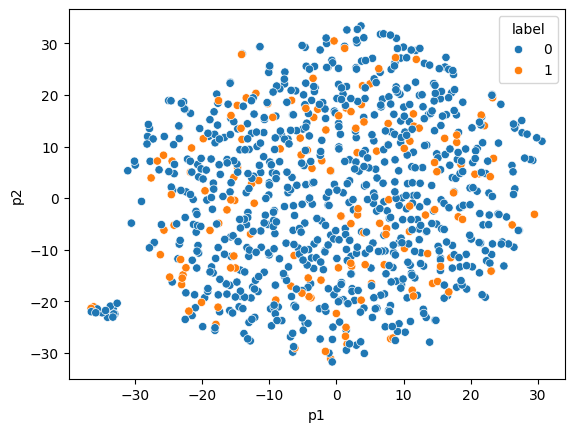

In [16]:
sns.scatterplot(data=df_tsne, x="p1", y="p2", hue="label")